In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.core.debugger import Tracer;

In [2]:
dataset = pd.read_csv("HLTVData/playerStats.csv")


In [3]:
dataset.head(20)

,Map,Player,Kills,Deaths,ADR,KAST%,Rating,MatchID
0,Nuke,4216,22,19,85.0,69.0,1.17,2311133/binary-dragons-vs-alpha-binary-dragons...
1,Nuke,3543,26,23,83.5,58.6,1.10,2311133/binary-dragons-vs-alpha-binary-dragons...
2,Nuke,3972,20,23,78.2,75.9,1.02,2311133/binary-dragons-vs-alpha-binary-dragons...
3,Nuke,2476,17,20,68.1,79.3,0.97,2311133/binary-dragons-vs-alpha-binary-dragons...
4,Nuke,2299,17,20,66.3,65.5,0.86,2311133/binary-dragons-vs-alpha-binary-dragons...
5,Nuke,11915,28,21,99.8,65.5,1.35,2311133/binary-dragons-vs-alpha-binary-dragons...
6,Nuke,12802,20,17,78.2,75.9,1.20,2311133/binary-dragons-vs-alpha-binary-dragons...
7,Nuke,7590,21,24,85.6,65.5,1.03,2311133/binary-dragons-vs-alpha-binary-dragons...
8,Nuke,2982,18,20,66.6,69.0,1.00,2311133/binary-dragons-vs-alpha-binary-dragons...
9,Nuke,9903,18,20,57.5,65.5,0.87,2311133/binary-dragons-vs-alpha-binary-dragons...


In [4]:
#mat = dataset.as_matrix()
#dataADR = dataset['ADR']
#dataRaiting = dataset['Rating']
#indexMatrix = np.array(range(dataset.shape[0]))

In [5]:
dataSet = pd.read_csv("HLTVData/playerStats.csv",usecols=['ADR','Rating'])
dataSet['Rating'] = dataSet['Rating']*100
dataSet.head()

,ADR,Rating
0,85.0,117.0
1,83.5,110.0
2,78.2,102.0
3,68.1,97.0
4,66.3,86.0


In [6]:
dataSet['Rating'] = dataSet['Rating']*100
dataSet.head()

,ADR,Rating
0,85.0,11700.0
1,83.5,11000.0
2,78.2,10200.0
3,68.1,9700.0
4,66.3,8600.0


In [7]:
#this never worked
#4 is the ADR and 6 is the Rating
#s = pd.DataFrame(dataset, index=indexMatrix,columns=(mat[:,4],mat[:,6]) )
#s = pd.DataFrame(dataset, index=np.array(range(dataset.shape[0])), columns=dataset['ADR'])

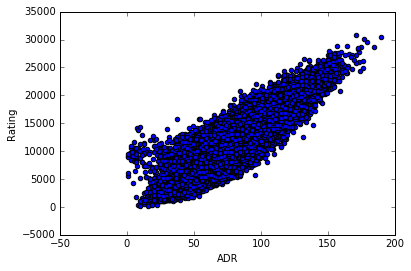

In [8]:
X= np.array(dataSet['ADR'])
y = np.array(dataSet['Rating'])
plt.scatter(X,y)
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [9]:
data = np.array(dataSet)
data
data[1,0]

83.5

In [10]:
def SSE(m,b,data):
    totalError=0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if(math.isnan(data[i,0])):
            totalNan +=1
        else:
            yOutput = m*data[i,0]+b
            y = data[i,1]
            error = (y-yOutput)**2
            totalError =totalError+ error
    return totalError
        

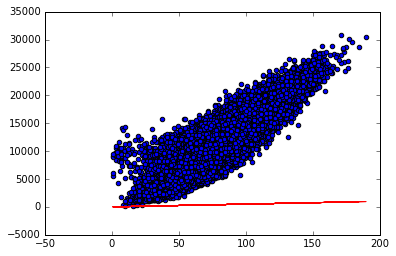

In [11]:
m = 5
b = 3
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [12]:
sse = SSE(m,b,data)
print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 5x + 3
SSE: 21208810622913.50


In [15]:
def gradient_descent_step(m,b,data):
    
    n_points = data.shape[0] #size of data
    m_grad = 0
    b_grad = 0
    stepper = 0.0001 #this is the learning rate
    
    for i in range(n_points):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]
        if(math.isnan(x)|math.isnan(y)): #it will prevent for crashing when some data is missing
            #print("is nan")
            continue
        
        #you will calculate the partical derivative for each value in data
        #Partial derivative respect 'm'
        dm = -((2/n_points) * x * (y - (m*x + b)))
        
        #Partial derivative respect 'b'
        db = - ((2/n_points) * (y - (m*x + b)))
    
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - stepper*m_grad
    b_updated = b - stepper*b_grad
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', but it's a concept
    out of the scope of this challenge. For now, just leave that there and think about it like a 'smoother' of the learn, 
    to prevent overshooting, that is, an extremly fast and uncontrolled learning.
    '''
    
    return m_updated,b_updated

In [ ]:
print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))
for i in range(10000):
    m,b = gradient_descent_step(m,b,data)
    sse = SSE(m,b,data)
    #print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))


Starting line: y = 141.63x + 4.13 - Error: 544419547173.20


In [ ]:
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [154]:
m

1.3801149416034815

In [155]:
b

2.9528691360225023